In [104]:
import pandas as pd 
from matplotlib import pyplot as plt
import sklearn as sk

# Import Dataset from folder as dataframe

Data=pd.read_excel('C:\course work\career\TTI\ModelingDataSet.xlsx')
Data.rename(columns={Data.columns[3]:'Extended_cost','Margin%':'Margin'},inplace=True)
Data.head()

,Transaction_ID,Unit_cost,Quantity,Extended_cost,Revenue,Margin
0,1,0.261167,1200,313.40,468.00,0.330341
1,2,1.073075,400,429.23,572.00,0.249597
2,3,0.109778,2880,316.16,662.88,0.523050
3,4,0.007200,24000,172.80,288.00,0.400000
4,5,0.012630,10000,126.30,320.00,0.605312


In [44]:

from sklearn.cluster import KMeans
import numpy as np


#Function to measure goodness of variance over number of clusters nb_b


def goodness_of_variance_fit(array, classes):
    # Number of clusters
    kmeans = KMeans(n_clusters=classes)
    # Fitting the input data
    kmeans = kmeans.fit(array)
    # Getting the cluster labels
    classified = kmeans.predict(array)

    array=np.array(array)
    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf


In [ ]:

#Loop to achieve desired convergence tolerance (0.01) 

gvf = 0.0
gkmeans=[]
nb_b= 2
prev=-1
while (gvf-prev) > 0.01:
    prev=gvf
    gvf = goodness_of_variance_fit(Data.Extended_cost.values.reshape(-1,1), nb_b)
    gkmeans.append(gvf)
    nb_b += 1

In [109]:
#Kmeans cluster for nb_b
kmeans = KMeans(n_clusters=nb_b)
# Fitting the input data
kmeans = kmeans.fit(Data.Extended_cost.values.reshape(-1,1))
# Getting the cluster labels
classified = kmeans.predict(Data.Extended_cost.values.reshape(-1,1))

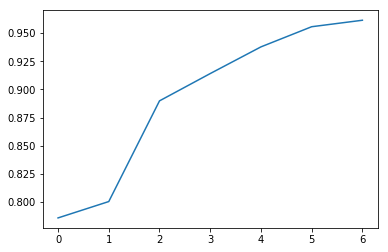

In [46]:
#plot goodness of fit over the number of bins

plt.plot(gkmeans)
plt.xlabel('Number of Bins')
plt.ylabe('Goodness of Variance fit (1 is best)')
plt.show()

In [110]:
Data['bins']=classified

In [49]:
array=np.array(list(zip(Data.Extended_cost,xls.bins)))
array=sorted(array,key=lambda x: x[0])

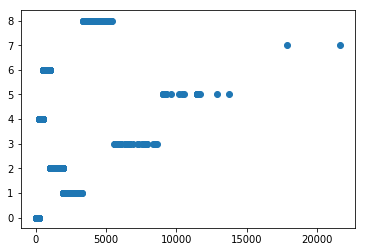

In [53]:
plt.scatter([a for a,b in array],[int(b) for a,b in array])
plt.show()

In [70]:
# K nearest neighbors classification

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Data.bins)
preds=neigh.predict(Data.Extended_cost.values.reshape(-1,1))

In [71]:
#Confusion matrix of Kmeans

sk.metrics.confusion_matrix(Data.bins,preds)

array([[18456,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,   263,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,   958,     0,     0,     0,     1,     0,     0],
       [    0,     0,     0,    39,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,  5870,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,    20,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,  2341,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     2,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,   153]], dtype=int64)

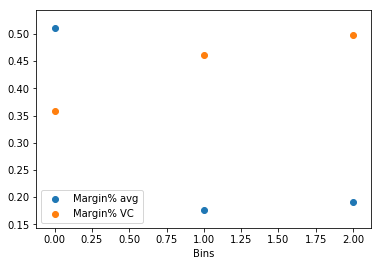

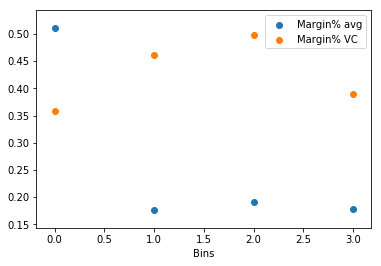

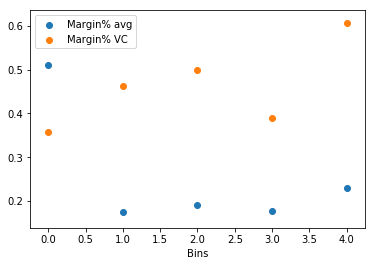

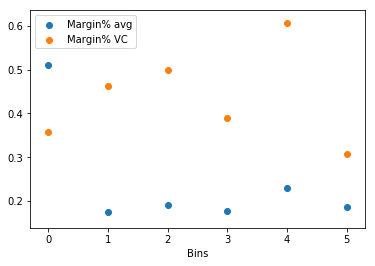

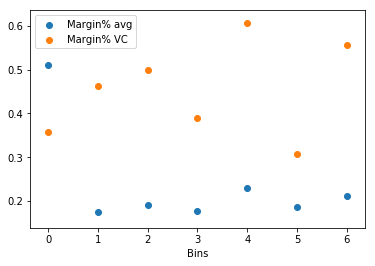

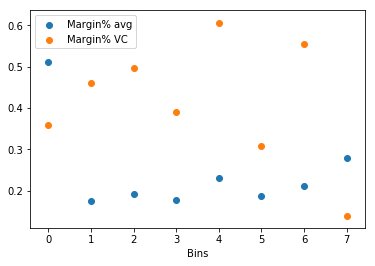

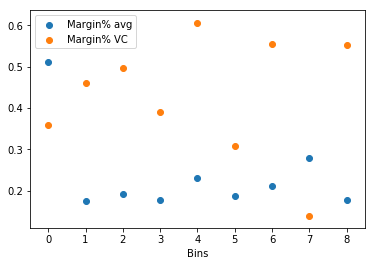

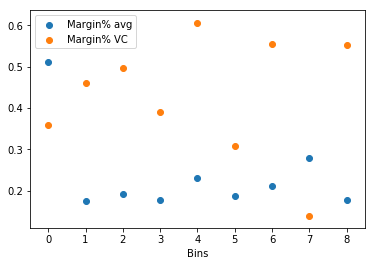

In [96]:
# Calculating classification matrix with number of bins


X=xls.Extended_cost.values.reshape(-1,1)
for i in range(3,11):
    kmeans = KMeans(n_clusters=nb_b)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    classified = kmeans.predict(X)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, xls.bins)
    xls['bins']=neigh.predict(xls.Extended_cost.values.reshape(-1,1))
    margin_avg=[]
    margin_cv=[]
    for j in range(i):
        margin_avg.append(xls.Margin[xls['bins']==j].mean())
        margin_cv.append(xls.Margin[xls['bins']==j].std()/xls.Margin[xls['bins']==j].mean())
    plt.scatter(range(i),margin_avg,label="Margin% avg")
    plt.scatter(range(i),margin_cv,label='Margin% VC')
    plt.legend()
    plt.xlabel('Bins')
    plt.show()

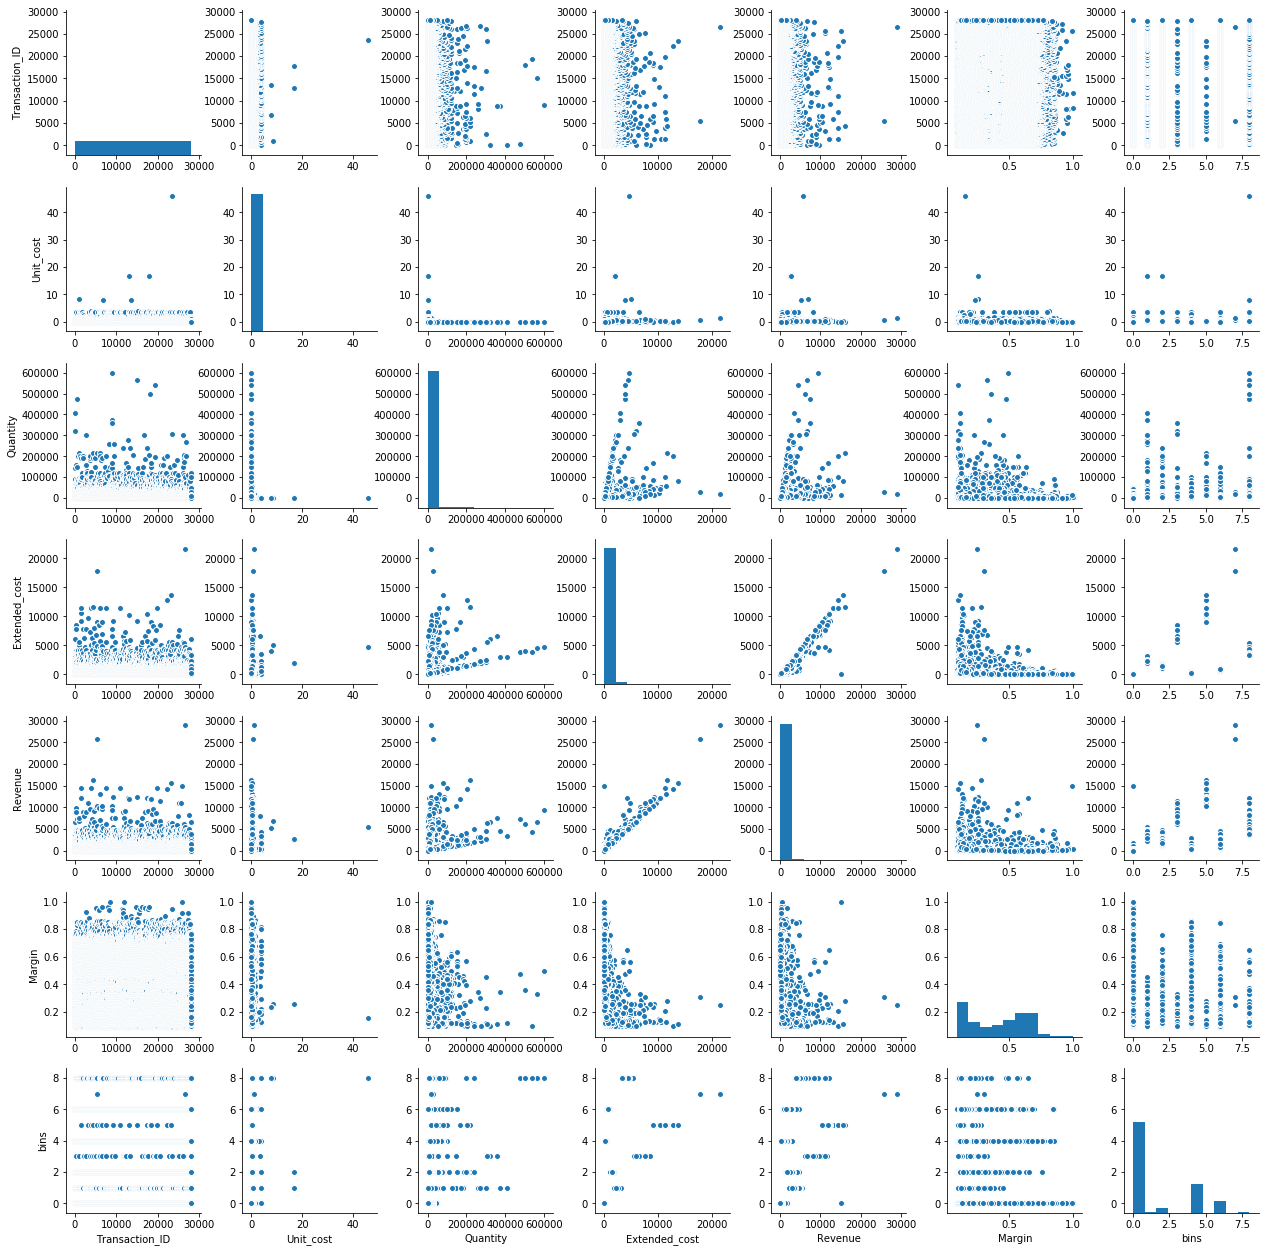

In [90]:
import seaborn as sns
sns.pairplot(xls)
plt.show()